In [1]:
'''
My science fair project! Take a look at https://github.com/dhrumilp15/Science-Fair/ for more docs!
Author: Dhrumil Patel
'''
#import libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import chain

In [2]:
# ODE
alpha_A = 1.0564*(10**-7) #  AHL production rate
alpha = 1.0564 * (10**-7)
alpha_R = 1.0 * (10**-7)# Production of PpuR

beta_A = 1.0564*(10**-6) # Feedback-regulated AHL production rate
beta = 1.0564*(10**-6)

x_0 = 5.4044 * (10**-7) # Initial value of AHL Concentration
R_0 = 1.0 # Initial value of PpuR Concentration
y_0 = 5.2 * (10**3) #Initial amount of Lactonase
n_0 = 1.0 # Size of biomass
s_0 = 1.0 # Amount of substrate

n = 2.3 # Hill coefficient for x
n_s = 2.5 # Hill Coefficient for substrate consumption process

m = 2.5 # Hill coefficient

gamma_A = 1.0 #Threshold of alpha_A
gamma_R = 1.0 #Threshold of alpha_R
gamma_S = 1.0 # Decay rate of substrate - Rate of substrate consumption
gamma = 0.105 #AHL Decay rate

pi_1_plus = 1e-7 # Rate at which AHL binds to PpuR
pi_minus = 10.0 # Rate at which AHL and PpuR split up(disassociate)

C_0 = 1.0 # Initial concentration of PpuR-AHL complex
C_th = 3.597 * (10**-13) # Threshold of positive feedback for AHL concentration, x_th
C_th2 = 1.0 #Threshold for lactonase activation

D = 2.5 # Dilution Rate

S = 1.0 # Concentration of Substrate

K_m = 1.0 # Carrying capacity, consumption rate is reached

tau = 2 # Delay in production of lactonase
delta = 1.5*(10**-4) # Lactonase-dependent AHL degradation rate
omega = 0.105 # Lactonase decay rate(w/ washout)
rho = 5.0521 * (10**3) # Lactonase Production Rate

N = 4.5929 * (10**11) #Cell density at equilibrium

x_th = 3.597 * (10**-12) #Critical threshold for positive-feedback in x
y_th = 3.597 * (10**-12) #Critical threshold for positive-feedback in y

#spanish_gamma = (pi_1_plus*alpha_R)/(pi_minus*gamma_R)

p = [alpha_A, beta_A, n, gamma_A, gamma_R, pi_1_plus, pi_minus, C_th, alpha_R]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 2000

t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)] # How long the graph will be

def single_cell_model(w0,t,p, q): # Initial Values of Functions user gives
  x_0, R_0, C_0 = w0 # We redefine the "initial values" of the function on each iteration in odeint
  
  alpha_A, beta_A, n, gamma_A, gamma_R, pi_1_plus, pi_minus, C_th, alpha_R = p # Parameters
  q = q # So that q can be introduced in AHL Concentration function
  f = [alpha_A + beta_A*((C_0**n)/(C_th**n + C_0**n))-gamma_A*x_0 - pi_1_plus*x_0*R_0 + pi_minus*C_0 - q*x_0,
       alpha_R - pi_1_plus* x_0* R_0 + pi_minus*C_0 - gamma_R*R_0,
       pi_1_plus*x_0*R_0 - pi_minus*C_0] # 1st Line - AHL Concentration, 2nd Line - PpuR Concentration, 3rd Line - PpuR-AHL Complex Concentration
  return f # Put functions in f to be integrated in solver()

  """
  1st line - Substrate concentration: D*s_0 - gamma_S * n_0 ((s_0**n_s)/((K_m ** n_s) + s_0 ** n_s)) - D*S
  
  2nd line - Biomass size: alpha_A * n_0 * ( (s_0 ** n_s) / ((K_m ** n_s) + s_0 ** n_s)) - D*n_0
  
  3rd  line - AHL Concentration: (alpha_A + beta_A*((C_0**n)/((C_th**n) + (C_0**n))))*n_0 - gamma_A*x_0 - pi_1_plus*R_0*x_0 + pi_1_minus*C_0 - D*x_0 - delta*x_0*y_0
  
  4th line - PpuR-AHL Concentration: pi_1_plus*R_0*x_0 - pi_1_minus*C_0
  
  5th line - PpuR Concentration: alpha_R + pi_1_minus*C_0 - pi_1_plus*R_0*x_0 - gamma_R*R_0
  
  Initial values of functions(will go to w1): s_0, n_0, C_0, R_0, x_0, y_0
  
  Variables(will go to p1): D, gamma_S, S, n_s, K_m, alpha_A, N, beta_A, n, C_th, gamma_A, pi_1_plus, pi_1_minus, delta, alpha_R, gamma_R
    
  Lactonase concentration: alpha_L*(C(t - tau)**m)/(C_th2**m + C(t - tau)**m)*n_0 - gamma_L * y_0 - D * y_0
  """

# def single_cell_full_model(w1, t, p1, q):
#   w1 = C_0, R_0, x_0, y_0, n_0, s_0
#   print(p1)
  
#   D, gamma_S, S, n_s, m, K_m, alpha_A, beta_A, n, C_th, C_th2, gamma_A, pi_1_plus, pi_minus, delta, alpha_R, gamma_R = p1
  
#   fm = [D * S - gamma_S * n_0*((s_0 ** n_s)/((K_m ** n_s) + (s_0 ** n_s))) - D * s_0,
#         alpha_A * n_0 * ( (s_0 ** n_s) / ((K_m ** n_s) + (s_0 ** n_s))) - D * n_0,
#         (alpha_A + beta_A * ((C_0 ** n)/((C_th ** n) + (C_0 ** n)))) * n_0 - gamma_A * x_0 - pi_1_plus * R_0 * x_0 + pi_minus * C_0 - D * x_0 - delta * x_0 * y_0,
#         pi_1_plus * R_0 * x_0 - pi_minus * C_0,
#         alpha_R + pi_minus * C_0 - pi_1_plus * R_0 * x_0 - gamma_R * R_0,
#        alpha_L*(C_0**m)/(C_th2**m + C_0**m)*n_0 - gamma_L * y_0 - D * y_0]
#   return fm

class Bacterium:
  def __init__(self,x_0, R_0, C_0):
    self.C_0 = C_0 # PpuR-AHL
    self.x_0 = x_0 # AHL concentration
    self.R_0 = R_0 # PpuR Concentration
    #self.y_0 = y_0 # Lactonase concentration
    #self.n_0 = n_0 # Size of biomass
    #self.s_0 = s_0 # Substrate
    self.w0 = [self.x_0, self.R_0, self.C_0]
    #self.w1 = [self.x_0, self.R_0, self.C_0, self.n_0, self.s_0, self.y_0]
  
  def solver(self):
    wsol = []
    for q in np.linspace(0.0, 3.0, num=100):
      wsol.append(odeint(single_cell_model, self.w0, t, args=(p, q), atol = abserr, rtol = relerr))
      # Atol and rtol are tolerants
    return wsol
  
  #def solver1(self):
    #wsol1 = odeint(full_model, self.w1, t, args=(p1,), atol = abserr, rtol = relerr)
    #return wsol1
    
  def nan_helper(self, A): # Takes care of NaNs
      ok = ~np.isnan(A) #Are there NaNs
      xp = ok.ravel().nonzero()[0] # x-coord of data values ravel for scaling up larger w/ multi-dim data
      fp = A[~np.isnan(A)]# y-coord of data values
      x  = np.isnan(A).ravel().nonzero()[0] # x-coord of interp values
      A[np.isnan(A)] = np.interp(x, xp, fp)
      return A
  
  def ranger(self,x, axis=1):
    return np.max(x, axis=axis) - np.min(x, axis=axis)
  
  def plot(self): #Function to plot graph
    
    # Two subplots, the axes array is 1-d
    N = 2 # Used only in this method
    #f, axarr = plt.subplots(N, sharex=False)
    x_new = []
    for i in range(0,100):
      x_new.append(self.solver()[i][:,0])
    
    ### Finding Double Difference between original AHl concentration and ones with AHL degrading enzyme
    x_diff = []
    x_new[0] = self.nan_helper(np.asarray(x_new[0]))
    for i in range(1,100):
      x_new[i] = self.nan_helper(np.asarray(x_new[i]))
      x_diff.append(np.gradient(x_new[0] - x_new[i])) 
    x_range = []
    
    #find ranges of values - ideally, we want something with a small range
    for i in range(len(x_diff)):
      x_range.append(np.ptp(x_diff[i]))
    
    print (np.where(np.square(x_diff[1]) < 0.0025))
    
    #for i in range(N):
      #axarr[i].plot(t, x_new[50*i], 'b')
      #axarr[i].set_title('AHL Concentration')
      #axarr[i].tick_params(
      #axis='x',          # changes apply to the x-axis
      #which='both',      # both major and minor ticks are affected
      #bottom='off',      # ticks along the bottom edge are off
      #labelbottom='off')
    
    # What the graph is going to look like
    original = plt.plot(t,x_new[0],'g', label = 'Original') # Graph with q set to 0
    q06 = plt.plot(t,x_new[20],'c', label = 'Degradation Rate = 0.61') # Graph with q set to 0.61
    q15 = plt.plot(t,x_new[50],'b', label = 'Degradation Rate = 1.5') # Graph with q set to 1.5 - EXTRANEOUS; AHL hits 0 :(
    q1 = plt.plot(t,x_new[99],'r', label = 'Degradation Rate = 3.0')# Graph with q set to 3  - EXTRANEOUS; AHL hits 0 :( 
    plt.legend(loc = 'upper right') # Put graph in upper right corner
    plt.xlabel('Time (h)') # Label of x axis
    plt.ylabel('AHL Concentration (M)') # Label of y axis
    plt.title('Performance of Tunable Biological Resistor') # Title
    plt.show() # Show graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars


(array([   0,    1,    2, ..., 1997, 1998, 1999]),)


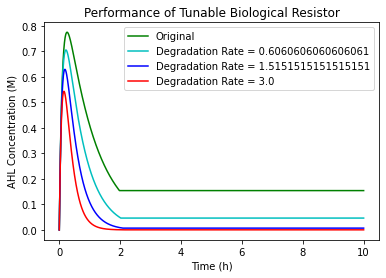

In [3]:
bob = Bacterium(x_0, R_0, C_0) # Initial Values assigned at beg. of code
bob.plot() # Time to plot